# POSTTEST 3 VISUALISASI DATA

Nama : Herni Suhartati <br>
NIM : 2109106001 <br>
Kelas : A1 Informatika 2021 <br>

### Chocolate Bars Dataset

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
df = pd.read_csv("chocolate_bars.csv")
data_visu=df.loc[:, ['id', 'manufacturer', 'company_location', 'year_reviewed', 'bar_name', 'cocoa_percent', 'rating']]
data_visu.to_csv("./dataset_coklat.csv")
df_visu = pd.read_csv("./dataset_coklat.csv", index_col=0)
df_visu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 0 to 2529
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   rating            2530 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 158.1+ KB


### Visualisasi Data I: Peminat Jumlah Kakao di Dalam Coklat Berdasarkan Rating

Dari visualisasi data di bawah pendistribusian nilai kandungan kakao condong di range 60 s/d 90 dan sebagian besar berada di range 3.5 s/d 4.0. Rating 4.0 sebagian besar berada pada jumlah kandungan kakao dengan range 60 s/d 75.

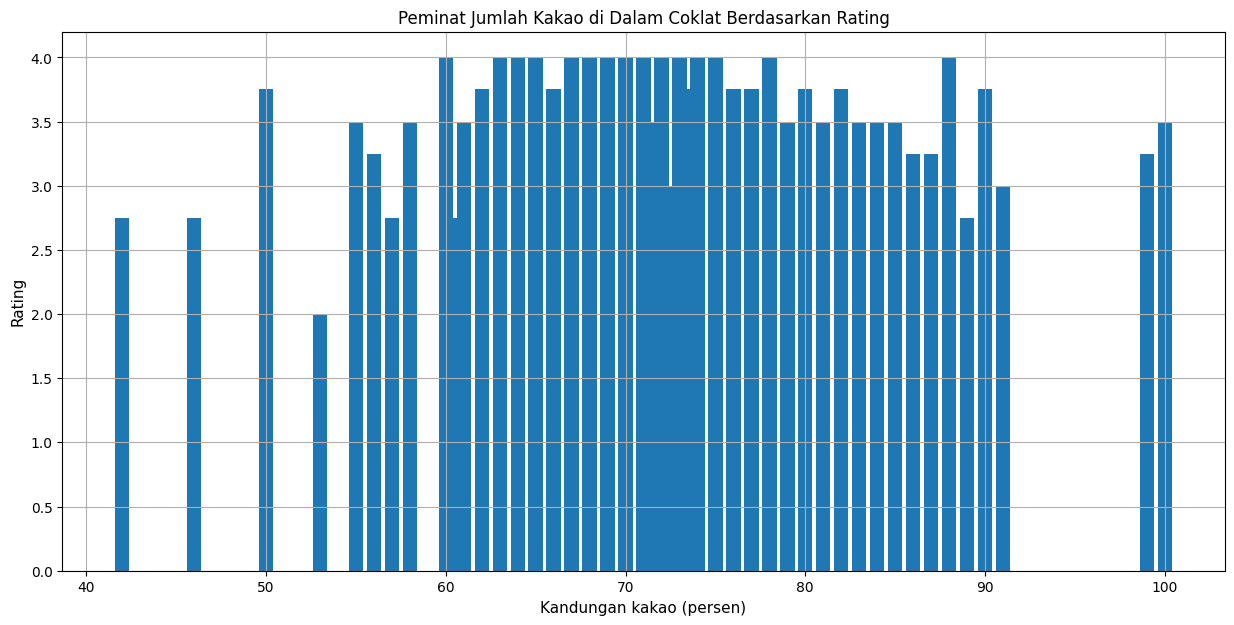

In [118]:
plt.figure(figsize=(15,7))
plt.grid()
plt.title('Peminat Jumlah Kakao di Dalam Coklat Berdasarkan Rating')
plt.xlabel('Kandungan kakao (persen)', fontsize=11)
plt.ylabel('Rating', fontsize=11)
plt.bar(df_visu['cocoa_percent'],df_visu['rating'])
plt.show()

### Visualisasi Data II: Time Series Review Jenis Coklat

Dari visualisasi data di bawah dari tahun 2006 s/d 2015 jumlah coklat yang di review terus mengalami kenaikan. Kenaikan grafik tertinggi berada pada tahun 2017 ke 2018 dan grafik penurunan terendah pada tahun 2019 ke 2020.

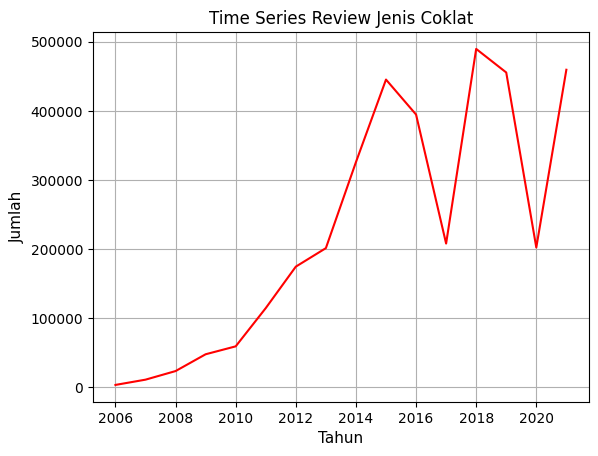

In [119]:
tahun= df_visu.dropna(subset=['year_reviewed']).sort_values(by=['year_reviewed'])['year_reviewed'].unique()
jumlah = df_visu.groupby(['year_reviewed'])['id'].sum()
plt.plot(tahun, jumlah, color='red')
plt.title('Time Series Review Jenis Coklat')
plt.xlabel('Tahun', fontsize=11)
plt.ylabel('Jumlah', fontsize=11)
plt.grid()
plt.show()

### Visualisasi Data III: Negara Pendistribusi Coklat

Visualisasi ini menggunakan 300 baris dataset teratas. Dari visualisasi data di bawah negara yang mendistribusikan coklat terbesar adalah <b>Canada</b> dengan jumlah persentase 35.3%, disusul <b>Belgium</b> dengan jumlah persentase 21%, dan negara yang mendistribusikan coklat terkecil adalah <b>Bolivia</b> dengan jumlah persentase 0.7%.

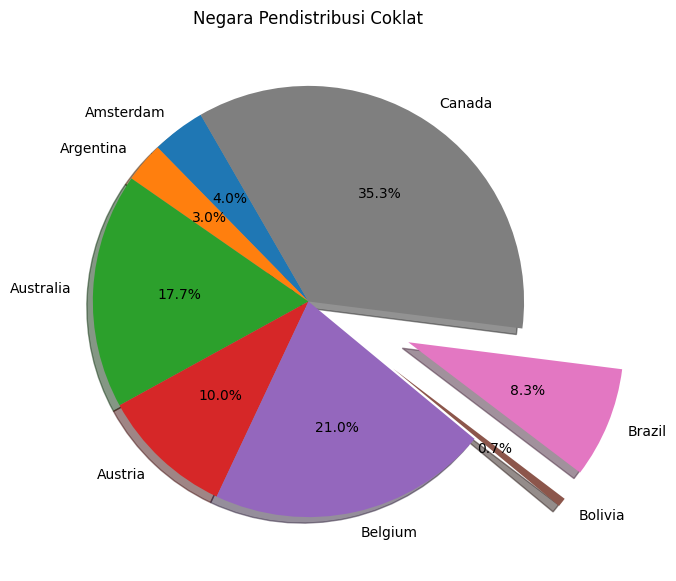

In [121]:
plottingan = df_visu.sort_values("company_location").head(300)
plt.figure(figsize=(15,7))
lokasi = plottingan.dropna(subset=['company_location']).sort_values(by=['company_location'])['company_location'].unique()
total = plottingan.groupby(['company_location'])['bar_name'].count()
plt.pie(total, labels=lokasi, autopct='%.1f%%', startangle = 120, explode = (0, 0, 0, 0, 0,0.5,0.5,0), shadow = True)
plt.title('Negara Pendistribusi Coklat')
plt.show()


### Visualisasi Data IV: Kuantitas Coklat yang di Review Berdasarkan Produsen

Visualisasi ini menggunakan 150 baris dataset teratas. Dari visualisasi data di bawah jenis coklat dari <b>Areta</b> paling banyak di review, disusul dengan <b>A.Morin</b>. Sebagian besar jumlah coklat dari produsen yang di review berada pada nilai dengan rentang 5 s/d 10.

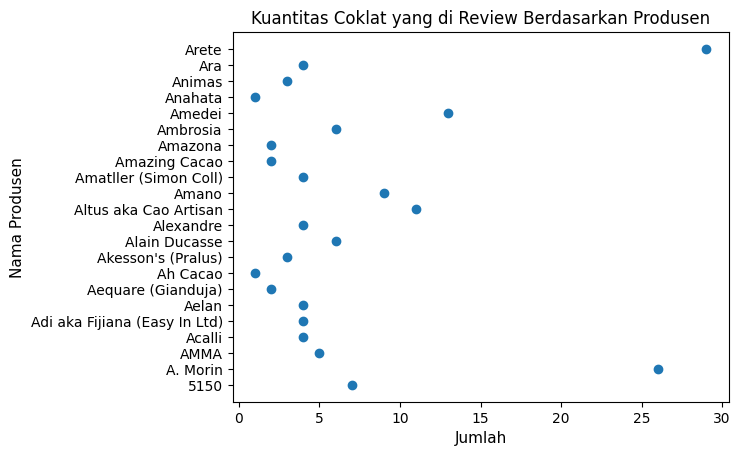

In [120]:
plottingan = df_visu.sort_values("manufacturer").head(150)
pabrik = plottingan.dropna(subset=['manufacturer']).sort_values(by=['manufacturer'])['manufacturer'].unique()
total = plottingan.groupby(['manufacturer'])['id'].count()
plt.title('Kuantitas Coklat yang di Review Berdasarkan Produsen')
plt.xlabel('Jumlah', fontsize=11)
plt.ylabel('Nama Produsen', fontsize=11)
plt.scatter(total, pabrik)
plt.show()